In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from netCDF4 import Dataset

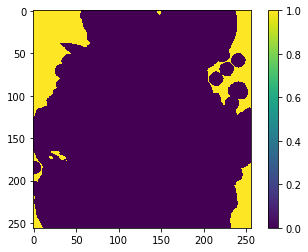

In [4]:
# Load example radar mask
mask_fn = '/home/s/S.Rasp/repositories/convective_variability_analysis/aux_files/radar_tot_mask_2016052800_2016060800_1_24.nc'
mask = np.any(Dataset(mask_fn, 'r').variables['radar_mask'][:], axis=(0, 1))
plt.imshow(mask)
plt.colorbar()

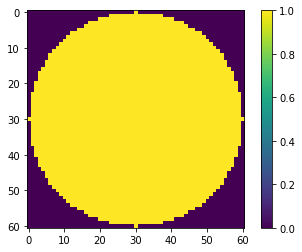

In [12]:
r_max = 30  # Maximum radius for RDF
# Create convolution kernel
dim = r_max * 2 + 1
y, x = np.ogrid[-r_max:dim - r_max, -r_max:dim - r_max]
kernel = x*x + y*y <= r_max*r_max
plt.imshow(kernel)
plt.colorbar()

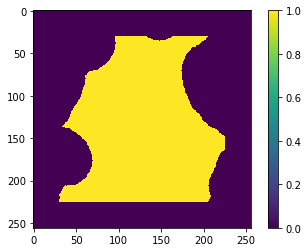

In [9]:
# convolve original array and create new mask
conv_mask = convolve2d(mask, kernel, mode='same', boundary='fill', fillvalue=1) == 0
plt.imshow(conv_mask)
plt.colorbar()

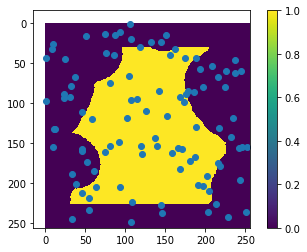

In [23]:
# Create some random points
n_rnd = 100
x_rnd = np.random.rand(n_rnd) * mask.shape[0]
y_rnd = np.random.rand(n_rnd) * mask.shape[1]
plt.imshow(conv_mask)
plt.colorbar()
plt.scatter(x_rnd, y_rnd)


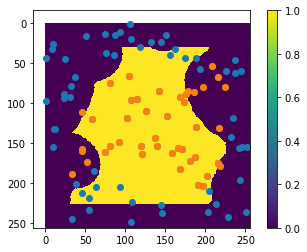

In [33]:
# Get all the points in the area
# non-pythonic way, but I couldnt quickly figure out how to do it well
indices = []

x_round = np.round(x_rnd)
y_round = np.round(y_rnd)

for i in range(n_rnd):
    if conv_mask[int(x_round[i]), int(y_round[i])] == 1:   # ATTENTION: WHy are the indices different here?
        indices.append(i)

plt.imshow(conv_mask)
plt.colorbar()
plt.scatter(x_rnd, y_rnd)
plt.scatter(x_rnd[indices], y_rnd[indices])

In [36]:
for ind in indices:
    print conv_mask[x_round[ind], y_round[ind]]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


/home/s/S.Rasp/anaconda2/envs/py_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
